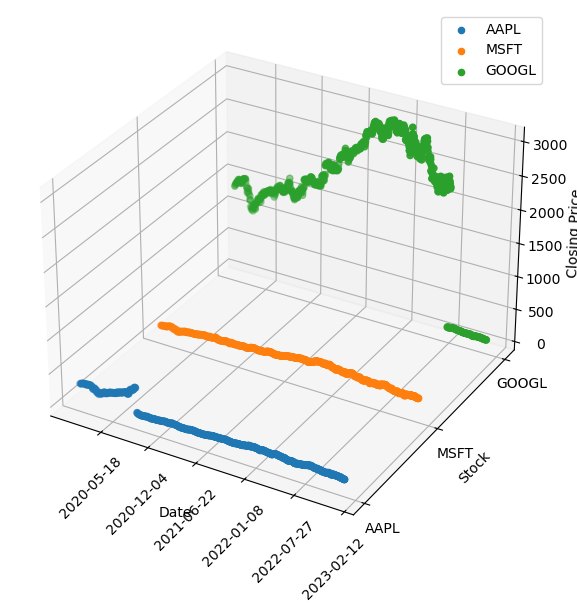

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from alpha_vantage.timeseries import TimeSeries
import datetime

# Define a function to fetch and preprocess stock data
def fetch_stock_data(symbols, api_key, start_date, end_date):
    ts = TimeSeries(api_key, output_format='pandas')
    stock_data = {}
    for symbol in symbols:
        data, meta_data = ts.get_daily(symbol, outputsize='full')
        # Filter by date and drop time from the datetime index
        data = data[(data.index >= start_date) & (data.index <= end_date)]
        stock_data[symbol] = data['4. close']
    return stock_data

# Define a function to plot the stock data
def plot_stock_data(stock_data, symbols):
    # Prepare the data
    closing_prices = pd.DataFrame(stock_data)
    closing_prices.dropna(inplace=True)
    dates = mdates.date2num(closing_prices.index.to_pydatetime())
    
    # Initialize the 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each stock's data
    for i, symbol in enumerate(symbols):
        ax.scatter(dates, [i] * len(dates), closing_prices[symbol], label=symbol)

    # Formatting the plot
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock')
    ax.set_zlabel('Closing Price')
    ax.set_yticks(range(len(symbols)))
    ax.set_yticklabels(symbols)
    ax.legend()
    plt.show()

# Define your API key, stock symbols, and date range
api_key = 'ORNLFT9FDB5IGN1W'
symbols = ['AAPL', 'MSFT', 'GOOGL']
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Fetch the stock data
stock_data = fetch_stock_data(symbols, api_key, start_date, end_date)

# Plot the stock data
plot_stock_data(stock_data, symbols)